Suppose we have a circuit consisting of:
* A voltage source u(t)
* A resistor, R
* A capacitor C

In [83]:
from sympy import *
u,vr, vc, i = symbols("u vr vc i" , cls=Function)
R,C, t = symbols("R C t", positive=True)
from sympy.abc import omega

Kirchhoff's voltage law is:

In [8]:
kvl = u(t) - i(t) * R - (1/C) * Integral( i(t), (t, 0, t))
kvl

-R*i(t) + u(t) - Integral(i(t), (t, 0, t))/C

We can differentiate everything to get rid of the integral

In [10]:
ode = kvl.diff(t)
ode

-R*Derivative(i(t), t) + Derivative(u(t), t) - i(t)/C

We can now pick a specific input function, eg. u(t) = sin($\omega$ t)

In [84]:
odeSin = ode.subs({u(t): sin(omega*t)}).simplify()
odeSin

-R*Derivative(i(t), t) + omega*cos(omega*t) - i(t)/C

And get sympy to solve for i(t)

In [106]:
answer = dsolve(odeSin, ics={i(0):0})
answer

Eq(i(t), C**2*R*omega**2*sin(omega*t)/(C**2*R**2*omega**2 + 1) + C*omega*cos(omega*t)/(C**2*R**2*omega**2 + 1) - C*omega*exp(-t/(C*R))/(C**2*R**2*omega**2 + 1))

The exponential term at the right will quickly die out, and we'll be left with the sum of a sin term (ie. in phase with the input voltage) and a cos term (leading the input voltage by ninety degrees).

Let's pick some actual values of R and C.  When frequency is low, we get low amplitude - whereas when freq is high we get high amplitude current.  But since our circuit is RC, high current means high voltage drop on the resistor, so low voltage on capacitor.  If we take our output as voltage across capacitor, then high freq means low output voltage => a low pass filter.

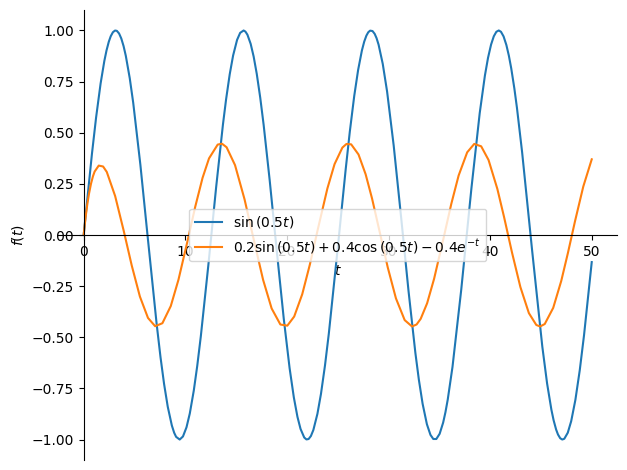

In [117]:
o = 0.5
actuals = answer.subs({C:1, R:1, omega:o}).simplify()
p1 = plot(sin(o*t), (t, 0, 50), show=False, legend=True)
p2 = plot(actuals.rhs.subs(omega,o), (t, 0, 50), show=False)

p1.append(p2[0])
p1.show()

Trig identities already tell us that when we sum Asin(t) + Bcos(t) we get sin(t + $\theta$) where $\theta$ = atan(A/B), and sympy knows some cases

In [82]:
trigsimp( sin(t) + cos(t))

sqrt(2)*sin(t + pi/4)